#**1. 단순 선형 회귀(Linear Regression)**

##**1-1. 기울기가 w0, 절편이 w1인 단순 선형 회귀 식을 적으시오.**

답: f(x)=w1+w0*x

##**1-2. RSS(Residual Sum of Square)의 회귀식을 작성할 때, w변수를 뭐라고 칭하는가?**


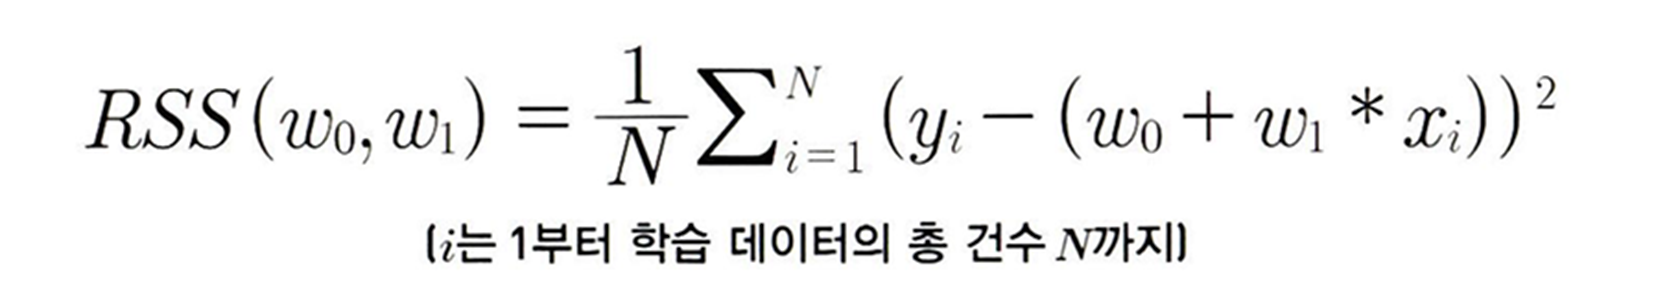

답: 회귀계수

#**2. 경사하강법(Gradient Descent)**

간단한 회귀 식인 y=3x+9를 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사하강법을 이용해 회귀계수 w1,w0을 도출하는 파이썬 코드를 작성하라.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##**2-1. 노이즈를 위한 난수 생성**

In [3]:
np.random.seed(0)

##**2-2. y=3x+9를 근사하는 코드를 작성**

In [4]:
X = 2*np.random.rand(100,1)
y = 9 + 3*X + np.random.rand(100,1)

##**2-3. X, y데이터 세트를 산점도로 시각화**

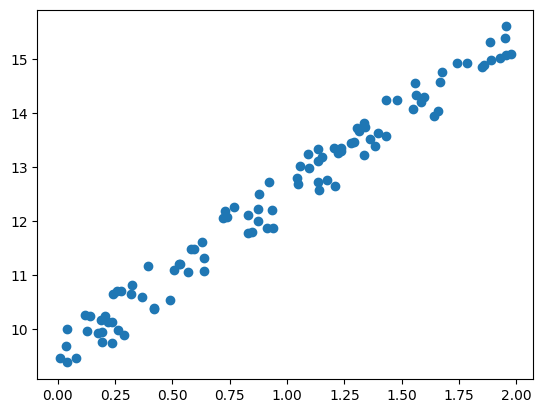

In [5]:
plt.scatter(X,y)

##**2-4. 실제 y값과 예측된 y값을 인자로 받아 다음 식을 계산하는 비용함수 get_cost()를 정의하라**
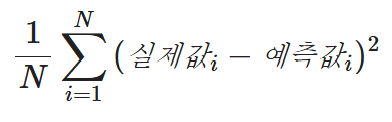

In [11]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

##**2-5 w1_update와 w0_update로 각각의 식의 값을 넘파이 dot행렬 연산으로 계산하고 이를 반환하는 get_weight_update 함수를 정의하라**
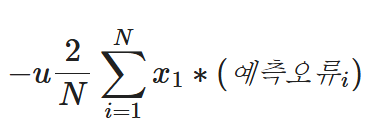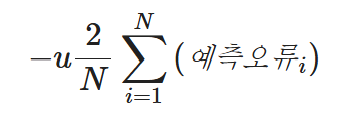

In [15]:
#w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)

  #w1_update,w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))
  #w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

##**2-6. get_weight_update()를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트 하는 함수인 gradient_descent_steps()함수를 생성하라.**

In [16]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트를 적용
def gradient_descent_steps(X,y,iters=10000):
  #w0와 w1을 모두 0으로 초기화
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  #인자로 주어진 iters만큼 반복적으로 get_weight_updates()를 호출해 w1,w0 업데이트 수행
  for ind in range(iters):
    w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

##**2-7. gradient_descent_steps()를 호출해 w1과 w0를 구하고 앞서 정의한 get_cost()를 이용해 경사 하강법의 예측 오류를 계산하라.**

In [17]:
w1,w0=gradient_descent_steps(X,y,iters=1000)
print('W1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

W1:3.105 w0:9.404
Gradient Descent Total Cost:0.0831


##**2-8. y_pred에 기반해 회귀선을 그려라.**

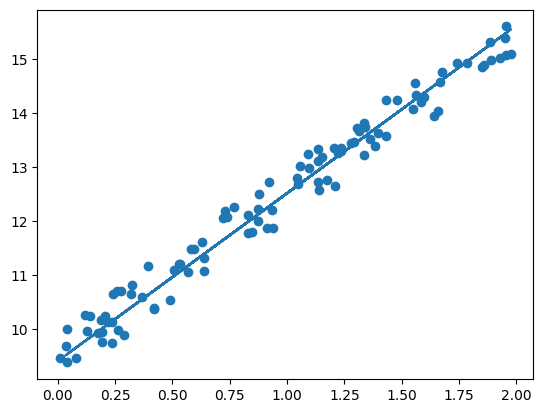

In [18]:
plt.scatter(X,y)
plt.plot(X,y_pred)

#**4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

##**4-1. 아래의 코드를 실행한 후 3가지 질문에 답하세요.**

In [19]:
###실행하세요.###

# 필요한 라이브러리 설치
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

# boston 데이터셋 준비
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# 데이터 세트의 target 배열은 주택 가격임.
# 이를 PRICE 칼럼으로 DataFrame에 추가함.

bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기: ' , bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


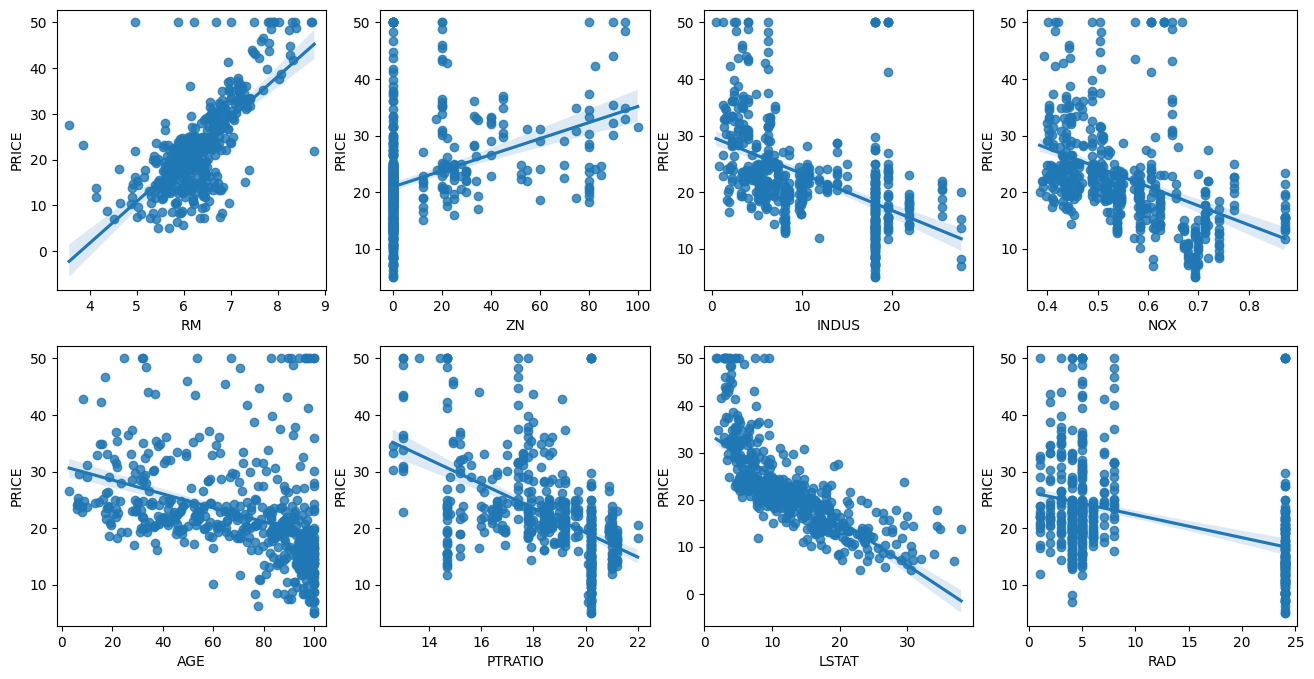

In [20]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO','LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

###**1) 위에서 주어진 시각화에서 PRICE에 가장 큰 영향을 미치는 두 개의 특성을 선택하세요.**

RM, LSTAT가 가장 큰 영향을 미치는 것으로 보인다.

###**2) 선택한 특성의 산점도를 기반으로 한 회귀 직선의 기울기를 해석하세요.**

- 기울기가 양수인지 음수인지, 그리고 그 의미는 무엇인지 서술해주세요.

RM과 PRICE 사이 관계의 기울기는 양수이고, LSTAT과 PRICE 사이 관계의 기울기는 음수이다. 기울기가 양수인 것, 즉 양의 상관관계는 RM이 커짐에 따라 PRICE가 높아지는 경향이 있음을 의미한다. 반대로, 기울기가 음수인 것, 즉 음의 상관관계라는 것은 LSTAT가 증가하면 PRICE는 감소하는 경향이 있다는 뜻이다.

###**3) 선택한 두 특성 외에, 추가적으로 고려할 만한 다른 특성은 무엇인지 논의하세요.**
- 이 특성이 가격에 미치는 영향에 대해 간단히 서술하세요.

그 외에 INDUS나 NOX도 값이 증가하면 PRICE는 감소하는 경향이 있다.

##**4-2. 다음 코드를 보고 2가지 질문에 답하세요.**
- 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정하는 코드
- 실행하지 않아도 됩니다.

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

lr = LinearRegression()

#cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

###**1) cross_val_score()에서 scoring ='neg_mean_squared_error'를 사용하는 이유는 무엇인가요?**
- 이 설정이 어떻게 MSE를 음수로 반환하는지 설명하세요.

scoring 함수는 score값이 클수록 좋은 모델로 인식한다. 하지만, 회귀 평가 지표는 오차값을 기반으로 하기 때문에 작을수록 좋은 결과이다. 따라서, (-1)을 곱한다.

###**2) cross_val_score()의 반환값에 -1을 곱하는 이유는 무엇인가요?**
- 이 과정을 통해 얻는 값은 무엇이며, 왜 이렇게 변환해야 하는지 간단히 설명하세요.

반환값은 MSE에 (-1)을 곱한 값이다. 그러나, 우리가 구해야할 값은 기존의 MSE 값이므로 다시 (-1)을 곱해준다.

#**05. 다항 회귀와 과(대)적합/과소적합 이해**

다음 코드를 실행하세요.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터 입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

#y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]입니다.
Degree 15 MSE는 181238256.56423894 입니다.


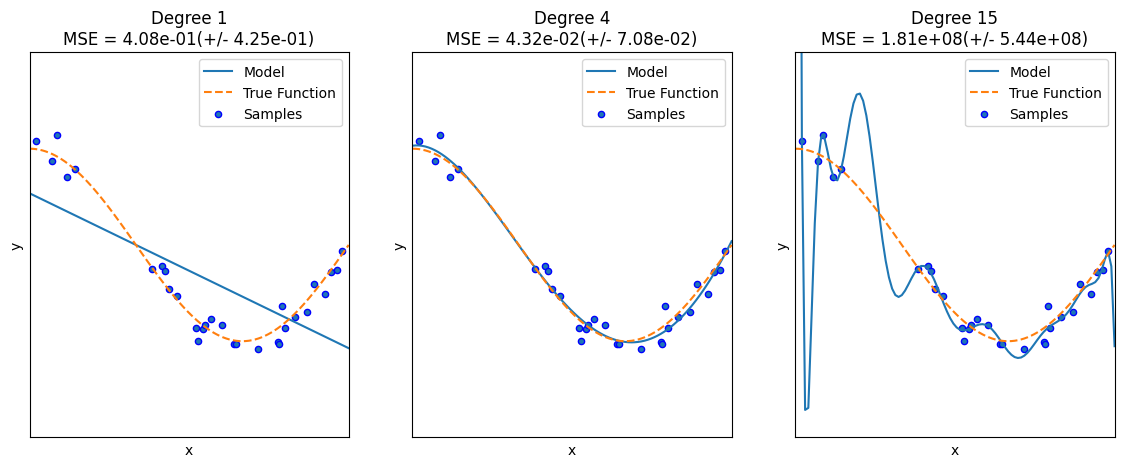

In [22]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

#다항 회귀의 차수(degress)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  #개별 degree별로 Polynomial 변환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  #교차 검증으로 다항 회귀 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
  #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  #0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
  #테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0,1,100)
  #예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
  #실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--',label='True Function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

##**5-1. 위의 세 개 곡선 중 과소 적합 모델과 과적합 모델은 무엇이며 그 이유는 무엇인가요?**

과소 적합 모델은 degree=1 model, 과적합 모델은 degree=15 model입니다. 왜냐하면, degree=1 모델은 편향이 크고, degree=15 모델은 개별 데이터의 특성을 지나치게 반영하여 변동성(고분산성)이 크기 때문이다.

##**5-2. 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 지점을 무엇이라고 하나요?**

골디락스 지점

#**6. 규제 선형 모델(릿지, 라쏘, 엘라스틱넷)**

##**6-1. 캘리포니아 주택 가격 데이터셋 로드(주소는 각자 저장된 위치에 따라 다르게)**
- 사이킷런의 California housing가 오류가 나는 경우가 많아 캐글에서 다운받아서 사용
- https://www.kaggle.com/datasets/sooyoungher/california-housing/data

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# 캘리포니아 데이터 세트 로드
# MedHouseVal 칼럼을 타깃으로
housingDF=pd.read_csv(r"/content/drive/MyDrive/Euron/fetch_california_housing.csv")
y_target = housingDF["MedHouseVal"]
X_data = housingDF.drop(["MedHouseVal"],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**6-2.get_linear_reg_eval() 함수 작성**

In [27]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)

        neg_mse_scores = cross_val_score(model, X_data_n,
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))

        ## cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        # 모델 학습
        model.fit(X_data_n, y_target_n)

        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

##**6-3. alpha=0.05일 때의 릿지모델 수행하기**

In [30]:
# 릿지에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출

ridge_alphas = [0.05]
coeff_ridge_df =get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Ridge #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 0.746 


##**6-4. elasticnet 모델에서 가장 좋은 예측 성능을 보이는 alpha 의 값이 얼마인지, 이때 RMSE의 값을 말하시오.**
- alpha = [0.005,0.01,0.1,1]

In [31]:
elastic_alphas = [0.005,0.01,0.1,1]
#get_linear_reg_eval() 함수 호출
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.005일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 0.01일 때 5 폴드 세트의 평균 RMSE: 0.748 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.931 


답안
1.alpha : 0.005  
2.RMSE : 0.746

##**6-5. get_scaled_data() 함수를 완성하시오.**

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정 >> log1p로
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
        scaled_data = pd.DataFrame(scaled_data, columns=input_data.columns)

    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
        scaled_data = pd.DataFrame(scaled_data, columns=input_data.columns)

    elif method == 'Log':
        scaled_data = np.log1p(input_data)

    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

#**7. 로지스틱 회귀**

##**7-1. 타이타닉 데이터셋 불러오기(주소는 각자 저장된 위치에 따라 다르게)**
- https://www.kaggle.com/c/titanic/data에서 train.csv 다운받아 사용

In [33]:
import pandas as pd
df=pd.read_csv(r"/content/drive/MyDrive/Euron/titanic_train.csv")
df.columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**7-2.데이터 전처리 하기**
- 앞선 타이타닉 데이터 분석에서 생존에 중요한 영향을 미쳤을 것이라 예상된 sex,age,pclass를 분석 feature로 활용한다.

In [36]:
# 성별(Sex)은 숫자 데이터로 : female 1, male 0로 / map() 함수 찾아보기
df['Sex']=df['Sex'].map({'female':1, 'male':0})

# 나이(Age)의 결측치는 평균값으로 대체
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df.isnull().sum()

<ipython-input-36-69cadf6dc31d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(value=df['Age'].mean(),inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [37]:
#객실등급(Pclass)은 1,2,3등석별 각각의 feature로 만들어 칼럼을 새로 생성해준다
dummies=pd.get_dummies(df['Pclass'])
del df['Pclass']
df=pd.concat([df,dummies],axis=1,join='inner')
df.rename(columns={1:'FirstClass',2:'SecondClass',3:'ThirdClass'},inplace=True)
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,ThirdClass
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,True,False,False
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,False,False,True


In [38]:
# 객실등급, 성별, 나이만 분석 feature로, 타깃은 생존 여부
features=df[['Sex','Age','FirstClass','SecondClass','ThirdClass']]
target=df[['Survived']]


##**7-3.정규 분포 형태의 표준 스케일링을 적용한 후 학습/테스트 데이터 세트로 분리하기**

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)

#학습/데이터 세트로 분리하기
# test_size=0.3
X_train,X_test,y_train,y_test=train_test_split(features_scaled, target, test_size=0.3, random_state=0)

##**7-4. 로지스틱 회귀를 이용해 학습 및 예측을 수행 후 모델의 정확도와 ROC-AUC 값 확인하기**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
# 로지스틱 회귀로 학습 및 예측 수행
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds=lr_clf.predict(X_test)

# 정확도와 ROC-AUC 값 구하기
print('accuracy:{:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc:{:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy:0.799
roc_auc:0.783


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##**7-5. GridSearchCV를 이용해 타이타닉 데이터 하이퍼 파라미터 최적화 진행하기**
- penalty:['l2', 'l1'],
- C:[0.01, 0.1, 1, 5, 10, 100]

In [44]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10, 100]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5 )
grid_clf.fit(features_scaled,target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.793


#**8. 회귀 트리**

##**8-1. 앞에서 사용한 타이타닉 데이터셋 재사용(주소는 각자 저장된 위치에 따라 다르게)**
- map()함수의 활용

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

df=pd.read_csv(r"/content/drive/MyDrive/Euron/titanic_train.csv")
df.columns
df.head()

# 성별(Sex)은 숫자 데이터로 : female 1, male 0
df['Sex']=df['Sex'].map({'female':1, 'male':0})

# 나이(Age)의 결측치는 평균값으로 대체
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df.isnull().sum()
# 객실등급(Pclass)은 1,2,3등석별 각각의 feature로 만들어 칼럼을 새로 생성해준다
dummies=pd.get_dummies(df['Pclass'])
del df['Pclass']
df=pd.concat([df,dummies],axis=1,join='inner')
df.rename(columns={1:'FirstClass',2:'SecondClass',3:'ThirdClass'},inplace=True)
df.head()

features=df[['Sex','Age','FirstClass','SecondClass','ThirdClass']]
target=df[['Survived']]



##**8-2. 회귀 트리 모델을 생성하고 3번의 교차 검증을 수행하기**

In [46]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, features, target, scoring="neg_mean_squared_error", cv=3)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('3 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('3 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('3 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

3 교차 검증의 개별 Negative MSE scores: [-0.18 -0.14 -0.15]
3 교차 검증의 개별 RMSE scores: [0.42 0.38 0.39]
3 교차 검증의 평균 RMSE: 0.396


##**8-3. 랜덤 포레스트, 결정 트리, GBM, XGBoost, ightGBM을 모두 이용해서 타이타닉 생존 예측하기**
- get_model_cv_prediction()는 그냥 실행해주세요.

In [47]:
# 함수를 실행해 주세요.

def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=2)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('###', model.__class__.__name__, '####')
  print('2 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimaotrs=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, features, target)

### DecisionTreeRegressor ####
2 교차 검증의 평균 RMSE: 0.401
### RandomForestRegressor ####
2 교차 검증의 평균 RMSE: 0.408
### GradientBoostingRegressor ####
2 교차 검증의 평균 RMSE: 0.419
### XGBRegressor ####
2 교차 검증의 평균 RMSE: 0.424
[LightGBM] [Warning] Unknown parameter: n_estimaotrs
[LightGBM] [Warning] Unknown parameter: n_estimaotrs
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 445, number of used features: 5
[LightGBM] [Info] Start training from score 0.375281
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

##**8-4. 피처 중요도 시각화하기**
- 이때 가장 영향력이 큰 피처는? (아래 마크다운을 해제하고 작성해주세요.)

<Axes: xlabel='None', ylabel='None'>

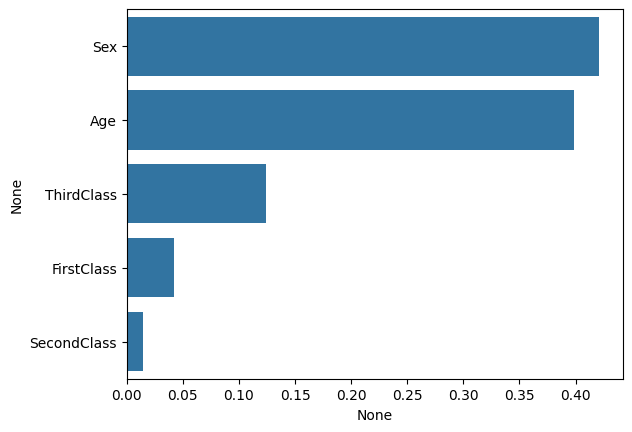

In [49]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=100)

#앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(features, target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=features.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

답안 : 성별(Sex) 피처의 영향력이 가장 큰 것으로 보인다